# The Duration of Unemployment - Replicating Lalive et al. (2006, ReStud)

## 1. The contribution of this study

    The principal objective of the study of Lalive et al, (2006) is to consider the influence of the change in insurance policy on the unemployment duration in Austria in late 1990s, which drives by both parameters of benefit replacement rate (RR) and the potential benefit duration (PBD). 
    In order to identify the causal effect of benefit duration on the willingness of individuals in job searching, a combined longitudinal database from both Austrian social security and Austrian unemployment register is employed which ranges from 1 August 1987 until 31 July 1991 (including 2 years prior to the enactment on the unemployment compensation and the following 2 years. In detail, in this natural experiment of studying the effect of exogeneous policy change on both compensated generosity and benefit duration of joblessness, Lalive et al (2006) divided in 4 groups based on the change of both parameters RR and BPD.
    Both effect of PBD and RR on unemployment duration and its exit rate had presented in various researches in both US and European countries. While the evidences for these effects is mixed but all of these studies share the common objection in policy endogeineity and most of them focused on studying the different level of effect on female and male workers.     
    In this study, two types of sensitivity analyses were conducted on several specific subgroups in terms of age, monthly income and previous wage which focus on the main issue of heterogeneity in treatment and control groups; if the exit rate of these groups are subject to different time trend, estimated treatment effects may suffer from biaseness problem. 
    In the conclusion part of this study, the authors introduced totally 3 predictions in the influences of the isolated change in RR, PBD and the combined effects on the change of both parameters on the job search effort, unemployment duration and joblessness exit rate. 
    
    The first prediction is if the entitlement effects are negligile and/or most unemployment exists take place before benefit expire, increases in RR and extension in PBD should lead to a reduction in job search effort and hence to longer unemployment durations.
    The second one was that increases of RR should trigger strong behavioural responses early in the unemployment spells, whereas behavioural responses due to an extension of PBD should lead to strong responses around the dates when the benefits expire.
    The last one is that a simultaneous increase in RR and PBD should lead to an increase in unemployment durations larger than the sum of the increases from 2 isolated changes in these policy parameters.
    
    Fortunately, the empirical results are clearly consistent with these prediction, however, there are 2 points of empirical results in this study which may not be reconciled with the theoretical predictions. The first one is the heterogeneity of PBD effect across the age groups. Contradicting to the prediction where an increase in experiences in older groups (more than age of 40) associates with a higher extension PBD, the empirical results illustrates a strong reaction of this group compared with the prime-age group. One of the reasons to explain this situation is the hirers' preferences for a position. Comparing with a candidate in prime-age groups, the olders one stands in a weaker position in the job market and may suffer from the strict age-discrimination for the same vacancy. This means that they have low incentive in searching a job due to low probability of employability. Therefore, a more generous unemployment insurance system may reduce the effort of searching job in old worker than one in prime-aged group.
    The second problem illustrated through empirical results is the lackage of theoretical evidence in explaining the interaction effects in variation of policy parameters among older and prime-age groups. An explanation given by Lalive et al (2006) is the too small size in the two policy changes which trigger to difficulty in measuring the interaction effects. However, the large interaction effect on the older worker group can be rationalized in much the same way to the large isolated effect of an effective tool PBD.

## 2. Attempt to replicate Table 4 of the paper

In [1]:
# Data Preparation
rm(list=objects())

In [3]:
# Loading some necessary packages
library(foreign)
library(survival)
library(dplyr)
library(tidyr)
library(KernSmooth)
library(ggplot2)

In [4]:
# Loading the dataset
udat <- read.dta("fi.dta")

In [5]:
# Checking the dimension
print(dim(udat))

[1] 225821    166


In [6]:
# Getting rid of some superfluous variables
udat <- udat[,1:134]

In [7]:
# Checking the quantity of four groups of unemployed workers
table(udat$type)


PBD and RR        PBD         RR    control 
     21174      99404      32470      72773 

In [8]:
# Computation of average spells when durations are truncated at 104 weeks
udat$dur104 <- udat$dur
udat$dur104[(udat$dur104 > 104)] = 104

## Question 2

In [9]:
# Creating a table containing "average", "std_dev", "std_error", "count"
table4 <- udat %>%
    mutate(Type = ifelse(type == 'PBD', 'ePBD group', ifelse(type == 'RR', 'eRR group', ifelse(type == 'PBD and RR', 'ePBD-RR group', 'Control group')))) %>%
    group_by(Type, after) %>%
    summarize(average = mean(dur104), standard_deviation = sd(dur104), count = n()) %>%
    mutate(standard_error = standard_deviation / sqrt(count))

In [10]:
table4

Type,after,average,standard_deviation,count,standard_error
Control group,0,14.46226,14.38562,33815,0.07823008
Control group,1,15.63168,17.16584,38958,0.08696947
ePBD-RR group,0,18.48832,17.71669,11992,0.16178444
ePBD-RR group,1,22.73973,22.32690,9182,0.23300208
ePBD group,0,15.83402,16.64017,48294,0.07572010
ePBD group,1,18.08298,20.61513,51110,0.09118705
eRR group,0,17.10815,15.45186,17160,0.11795657
eRR group,1,19.09596,18.83882,15310,0.15225308


In [11]:
# Changing the of average table
avg_table4 <- table4 %>%
    select(Type, after, average) %>%
    spread(after, average) %>%
    mutate(Value = 'average') %>%
    rename(Before_August_1989 = '0', After_August_1989 = '1') %>%
    mutate(Change_After_Before = After_August_1989 - Before_August_1989) %>%
    mutate(Diff_in_diff = Change_After_Before - 1.17) %>%
    mutate_if(is.numeric, round, 2)
avg_table4$Position = c(4, 3, 1, 2)

In [12]:
# Changing form of std_error table
ste_table4 <- table4 %>%
    select(Type, after, standard_error) %>%
    spread(after, standard_error) %>%
    mutate(Value = 'ste') %>%
    rename(Before_August_1989 = '0', After_August_1989 = '1') %>%
    mutate(Change_After_Before = sqrt(After_August_1989**2 + Before_August_1989**2)) %>%
    mutate(Diff_in_diff = sqrt(Change_After_Before**2 + 0.12**2)) %>%
    mutate_if(is.numeric, round, 2)
ste_table4$Position = c(4, 3, 1, 2)

In [13]:
# Changing form of count table
count_table4 <- table4 %>%
    select(Type, after, count) %>%
    spread(after, count) %>%
    mutate(Value = 'count') %>%
    rename(Before_August_1989 = '0', After_August_1989 = '1') %>%
    mutate_if(is.numeric, round, 0)
count_table4$Position = c(4, 3, 1, 2)

In [14]:
# Concatenating three tables by rows
table4_final <- bind_rows(avg_table4, ste_table4, count_table4)

In [15]:
# Selecting necessaire variables
table4_final <- table4_final %>%
    arrange(Position) %>%
    select(Type, Value, Before_August_1989, After_August_1989, Change_After_Before, Diff_in_diff)

In [16]:
# Putting values of Diff_in_diff variable in Control group = NA
table4_final$Diff_in_diff[table4_final$Type == 'Control group'] = NA

In [17]:
# Performing the results
table4_final

Type,Value,Before_August_1989,After_August_1989,Change_After_Before,Diff_in_diff
ePBD group,average,15.83,18.08,2.25,1.08
ePBD group,ste,0.08,0.09,0.12,0.17
ePBD group,count,48294.00,51110.00,NA,NA
eRR group,average,17.11,19.10,1.99,0.82
eRR group,ste,0.12,0.15,0.19,0.23
eRR group,count,17160.00,15310.00,NA,NA
ePBD-RR group,average,18.49,22.74,4.25,3.08
ePBD-RR group,ste,0.16,0.23,0.28,0.31
ePBD-RR group,count,11992.00,9182.00,NA,NA
Control group,average,14.46,15.63,1.17,NA


## 3. Seek to reproduce Figure 3 in Lalive et al. (2006)

In [18]:
# Selecting sub-samples
PBD_before <- udat %>%
    filter(after == 0, type == 'PBD') %>%
    select(dur, dur104, uncc)
PBD_after <- udat %>%
    filter(after == 1, type == 'PBD') %>%
    select(dur, dur104, uncc)
RR_before <- udat %>%
    filter(after == 0, type == 'RR') %>%
    select(dur, dur104, uncc)
RR_after <- udat %>%
    filter(after == 1, type == 'RR') %>%
    select(dur, dur104, uncc)
PBD_RR_before <- udat %>%
    filter(after == 0, type == 'PBD and RR') %>%
    select(dur, dur104, uncc)
PBD_RR_after <- udat %>%
    filter(after == 1, type == 'PBD and RR') %>%
    select(dur, dur104, uncc)
control_before <- udat %>%
    filter(after == 0, type == 'control') %>%
    select(dur, dur104, uncc)
control_after <- udat %>%
    filter(after == 1, type == 'control') %>%
    select(dur, dur104, uncc)

In [19]:
# Indicating censored/non-censored observations
surv_PBD_before <- Surv(PBD_before$dur104, PBD_before$uncc)
surv_PBD_after <- Surv(PBD_after$dur104, PBD_after$uncc)

surv_RR_before <- Surv(RR_before$dur104, RR_before$uncc)
surv_RR_after <- Surv(RR_after$dur104, RR_after$uncc)

surv_PBD_RR_before <- Surv(PBD_RR_before$dur104, PBD_RR_before$uncc)
surv_PBD_RR_after <- Surv(PBD_RR_after$dur104, PBD_RR_after$uncc)

surv_control_before <- Surv(control_before$dur104, control_before$uncc)
surv_control_after <- Surv(control_after$dur104, control_after$uncc)

In [20]:
# Estimating survivor function using Kaplan-Meier model
surv_PBD_before.fit <- survfit(surv_PBD_before ~ 1)
surv_PBD_after.fit <- survfit(surv_PBD_after ~ 1)

surv_RR_before.fit <- survfit(surv_RR_before ~ 1)
surv_RR_after.fit <- survfit(surv_RR_after ~ 1)

surv_PBD_RR_before.fit <- survfit(surv_PBD_RR_before ~ 1)
surv_PBD_RR_after.fit <- survfit(surv_PBD_RR_after ~ 1)

surv_control_before.fit <- survfit(surv_control_before ~ 1)
surv_control_after.fit <- survfit(surv_control_after ~ 1)

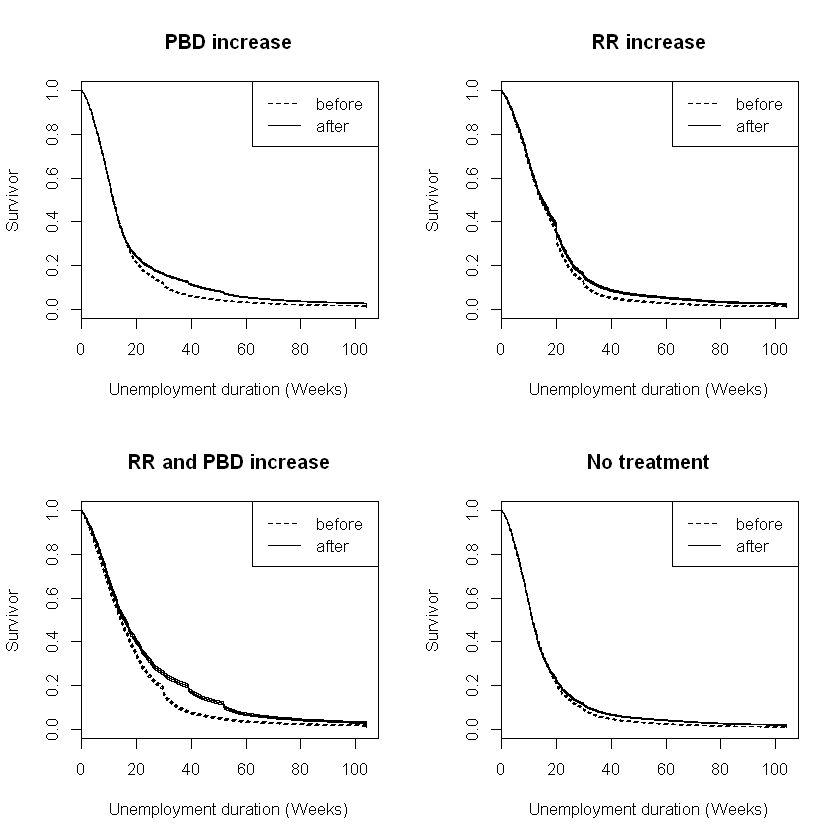

In [21]:
# Plotting the results
par(mfrow = c(2, 2))
plot(surv_PBD_before.fit, lty = "dashed", main="PBD increase", xlab="Unemployment duration (Weeks)", ylab="Survivor")
par(new=TRUE)
plot(surv_PBD_after.fit, lty = "solid", lwd = 1, xlab="Unemployment duration (Weeks)", ylab="Survivor")
par(new=T)
legend("topright", legend=c("before","after"),lty=2:1)

plot(surv_RR_before.fit, lty = "dashed", main="RR increase", xlab="Unemployment duration (Weeks)", ylab="Survivor")
par(new=TRUE)
plot(surv_RR_after.fit, lty = "solid", lwd = 1, xlab="Unemployment duration (Weeks)", ylab="Survivor")
par(new=T)
legend("topright", legend=c("before","after"),lty=2:1)

plot(surv_PBD_RR_before.fit, lty = "dashed", main="RR and PBD increase", xlab="Unemployment duration (Weeks)", ylab="Survivor")
par(new=TRUE)
plot(surv_PBD_RR_after.fit, lty = "solid", lwd = 0.5, xlab="Unemployment duration (Weeks)", ylab="Survivor")
par(new=T)
legend("topright", legend=c("before","after"),lty=2:1)

plot(surv_control_before.fit, lty = "dashed", main="No treatment", xlab="Unemployment duration (Weeks)", ylab="Survivor")
par(new=TRUE)
plot(surv_control_after.fit, lty = "solid", lwd = 1, xlab="Unemployment duration (Weeks)", ylab="Survivor")
par(new=T)
legend("topright", legend=c("before","after"),lty=2:1)

## 4. Seek to reproduce Figure 4 in Lalive et al. (2006)

In [25]:
# Estimating the hazard using PH model 
breaks <- seq(from=4,to=104, by=4)

gux1 <- survSplit(Surv(dur,uncc) ~., data=PBD_before, cut = breaks, end = "time", event="death", start="start", episode="interval")
gux1 <- mutate(gux1,exposure = time - start, interval=factor(interval+1, labels = 1) )
di_PBD0<-death~interval
model1<-glm(di_PBD0 , offset = log(exposure),data=gux1,family = "poisson")
levels1<-c(coefficients(model1)[1],coefficients(model1)[2:26]+coefficients(model1)[1])

gux2 <- survSplit(Surv(dur,uncc) ~., data=PBD_after, cut = breaks, end = "time", event="death", start="start", episode="interval")
gux2 <- mutate(gux2,exposure = time - start, interval=factor(interval+1, labels = 1) )
model2<-glm(di_PBD0 , offset = log(exposure),data=gux2,family = "poisson")
levels2<-c(coefficients(model2)[1],coefficients(model2)[2:26]+coefficients(model2)[1])

gux3 <- survSplit(Surv(dur,uncc) ~., data=RR_before, cut = breaks, end = "time", event="death", start="start", episode="interval")
gux3 <- mutate(gux3,exposure = time - start, interval=factor(interval+1, labels = 1) )
di_RR0<-death~interval
model3<-glm(di_RR0 , offset = log(exposure),data=gux3,family = "poisson")
levels3<-c(coefficients(model3)[1],coefficients(model3)[2:26]+coefficients(model3)[1])

gux4 <- survSplit(Surv(dur,uncc) ~., data=RR_after, cut = breaks, end = "time", event="death", start="start", episode="interval")
gux4 <- mutate(gux4,exposure = time - start, interval=factor(interval+1, labels = 1) )
model4<-glm(di_RR0 , offset = log(exposure),data=gux4,family = "poisson")
levels4<-c(coefficients(model4)[1],coefficients(model4)[2:26]+coefficients(model4)[1])

gux5 <- survSplit(Surv(dur,uncc) ~., data=PBD_RR_before, cut = breaks, end = "time", event="death", start="start", episode="interval")
gux5 <- mutate(gux5,exposure = time - start, interval=factor(interval+1, labels = 1) )
di_PBD_RR0<-death~interval
model5<-glm(di_PBD_RR0 , offset = log(exposure),data=gux5,family = "poisson")
levels5<-c(coefficients(model5)[1],coefficients(model5)[2:26]+coefficients(model5)[1])

gux6 <- survSplit(Surv(dur,uncc) ~., data=PBD_RR_after, cut = breaks, end = "time", event="death", start="start", episode="interval")
gux6 <- mutate(gux6,exposure = time - start, interval=factor(interval+1, labels = 1) )
model6<-glm(di_PBD_RR0 , offset = log(exposure),data=gux6,family = "poisson")
levels6<-c(coefficients(model6)[1],coefficients(model6)[2:26]+coefficients(model6)[1])

gux7 <- survSplit(Surv(dur,uncc) ~., data=control_before, cut = breaks, end = "time", event="death", start="start", episode="interval")
gux7 <- mutate(gux7,exposure = time - start, interval=factor(interval+1, labels = 1) )
di_control0<-death~interval
model7<-glm(di_control0 , offset = log(exposure),data=gux7,family = "poisson")
levels7<-c(coefficients(model7)[1],coefficients(model7)[2:26]+coefficients(model7)[1])

gux8 <- survSplit(Surv(dur,uncc) ~., data=control_after, cut = breaks, end = "time", event="death", start="start", episode="interval")
gux8 <- mutate(gux8,exposure = time - start, interval=factor(interval+1, labels = 1) )
model8<-glm(di_control0 , offset = log(exposure),data=gux8,family = "poisson")
levels8<-c(coefficients(model8)[1],coefficients(model8)[2:26]+coefficients(model8)[1])

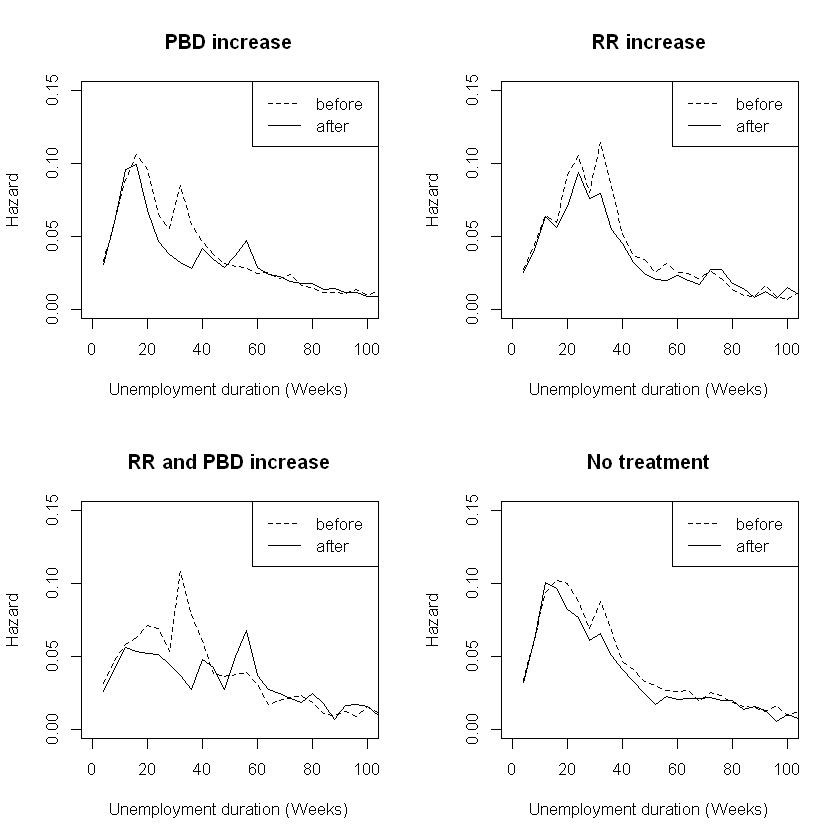

In [26]:
# Plotting the results -> to reporduce Figure 4 in the paper
par(mfrow = c(2, 2))
plot(exp(levels1)~breaks ,type = "l",lty = "dashed", xlim=c(0,100),ylim=c(0,0.15),xlab = "Unemployment duration (Weeks)",ylab = "Hazard")
par(new=T)
plot(exp(levels2)~breaks ,type = "l",lty = "solid", xlim=c(0,100),ylim=c(0,0.15),xlab = "Unemployment duration (Weeks)",ylab = "Hazard")
par(new=T)
title("PBD increase")
legend("topright", legend=c("before","after"),lty=2:1)

plot(exp(levels3)~breaks ,type = "l",lty = "dashed", xlim=c(0,100),ylim=c(0,0.15),xlab = "Unemployment duration (Weeks)",ylab = "Hazard")
par(new=T)
plot(exp(levels4)~breaks ,type = "l",lty = "solid", xlim=c(0,100),ylim=c(0,0.15),xlab = "Unemployment duration (Weeks)",ylab = "Hazard")
par(new=T)
title("RR increase")
legend("topright", legend=c("before","after"),lty=2:1)

plot(exp(levels5)~breaks ,type = "l",lty = "dashed", xlim=c(0,100),ylim=c(0,0.15),xlab = "Unemployment duration (Weeks)",ylab = "Hazard")
par(new=T)
plot(exp(levels6)~breaks ,type = "l",lty = "solid", xlim=c(0,100),ylim=c(0,0.15),xlab = "Unemployment duration (Weeks)",ylab = "Hazard")
par(new=T)
title("RR and PBD increase")
legend("topright", legend=c("before","after"),lty=2:1)

plot(exp(levels7)~breaks ,type = "l",lty = "dashed", xlim=c(0,100),ylim=c(0,0.15),xlab = "Unemployment duration (Weeks)",ylab = "Hazard")
par(new=T)
plot(exp(levels8)~breaks ,type = "l",lty = "solid", xlim=c(0,100),ylim=c(0,0.15),xlab = "Unemployment duration (Weeks)",ylab = "Hazard")
par(new=T)
title("No treatment")
legend("topright", legend=c("before","after"),lty=2:1)

In [27]:
# Creating list of survivor function and duration estimated by KM model
hist_surv = list(summary(surv_PBD_before.fit)$surv, summary(surv_PBD_after.fit)$surv, summary(surv_RR_before.fit)$surv, 
                 summary(surv_RR_after.fit)$surv, summary(surv_PBD_RR_before.fit)$surv, summary(surv_PBD_RR_after.fit)$surv, 
                 summary(surv_control_before.fit)$surv, summary(surv_control_after.fit)$surv)
hist_dur = list(summary(surv_PBD_before.fit)$time, summary(surv_PBD_after.fit)$time, summary(surv_RR_before.fit)$time, 
                 summary(surv_RR_after.fit)$time, summary(surv_PBD_RR_before.fit)$time, summary(surv_PBD_RR_after.fit)$time, 
                 summary(surv_control_before.fit)$time, summary(surv_control_after.fit)$time)

In [30]:
# Estimating hazard based on estimated survivor function S(t)
hazard = list()
local_regress = list()
for (i in (1:length(hist_surv))) { # loop for 8 dataset PBD, RR, PBD and RR, control before and after 1989
    S = hist_surv[[i]]
    t = hist_dur[[i]]
    F = 1 - S
    weeks = seq(1, length(t), length.out = 104) # pick a smaller number of points on S(t) by week
    S_week = S[weeks]
    F_week = F[weeks]
    t_week = t[weeks]
    f_week = (F_week[2:104] - F_week[1:103])/(t_week[2:104] - t_week[1:103]) # computing approximation to f(t) = dF(t)/dt
    lambda = f_week[1:102]/S_week[1:102] # estimate hazard
    hazard[[i]] <- lambda
    local_regress[[i]] <- locpoly(c(1:102), lambda, bandwidth = 2) # using local polynomial regression smoother
}

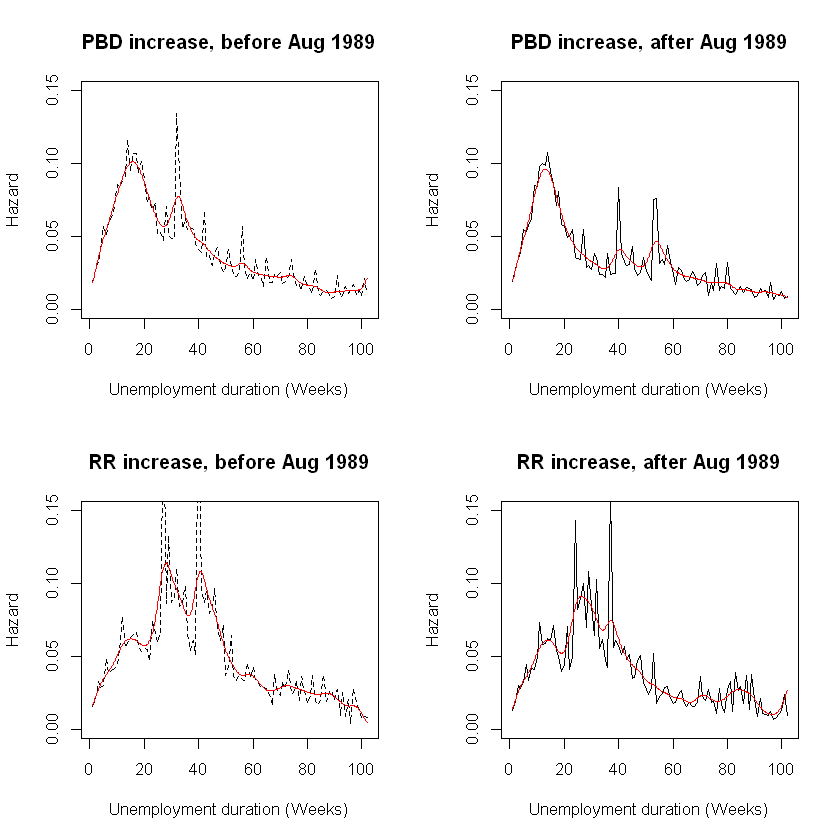

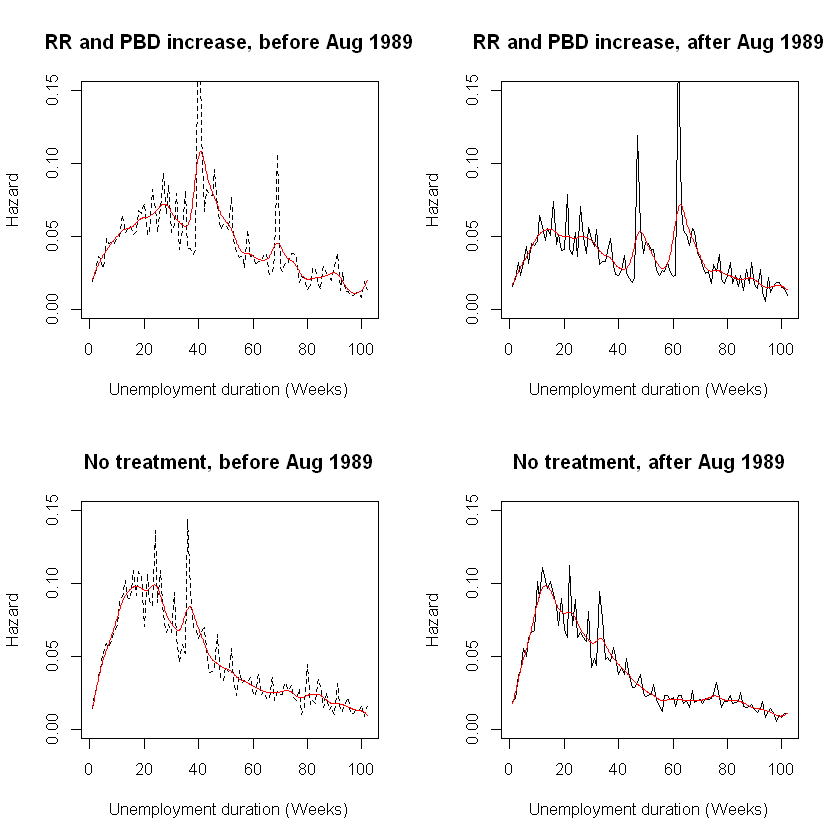

In [32]:
# Plotting the results
par(mfrow = c(2, 2))
plot(hazard[[1]], type = 'l', lty = "dashed", main="PBD increase, before Aug 1989", ylim = c(0, 0.15), xlab="Unemployment duration (Weeks)", ylab="Hazard")
par(new = TRUE)
lines(local_regress[[1]], col = 'red')

plot(hazard[[2]], type = 'l', lty = "solid", main="PBD increase, after Aug 1989", ylim = c(0, 0.15), xlab="Unemployment duration (Weeks)", ylab="Hazard")
par(new = TRUE)
lines(local_regress[[2]], col = 'red')

plot(hazard[[3]], type = 'l', lty = "dashed", main="RR increase, before Aug 1989", ylim = c(0, 0.15), xlab="Unemployment duration (Weeks)", ylab="Hazard")
par(new = TRUE)
lines(local_regress[[3]], col = 'red')

plot(hazard[[4]], type = 'l', lty = "solid", main="RR increase, after Aug 1989", ylim = c(0, 0.15), xlab="Unemployment duration (Weeks)", ylab="Hazard")
par(new = TRUE)
lines(local_regress[[4]], col = 'red')

par(mfrow = c(2, 2))
plot(hazard[[5]], type = 'l', lty = "dashed", main="RR and PBD increase, before Aug 1989", ylim = c(0, 0.15), xlab="Unemployment duration (Weeks)", ylab="Hazard")
par(new = TRUE)
lines(local_regress[[5]], col = 'red')

plot(hazard[[6]], type = 'l', lty = "solid", main="RR and PBD increase, after Aug 1989", ylim = c(0, 0.15), xlab="Unemployment duration (Weeks)", ylab="Hazard")
par(new = TRUE)
lines(local_regress[[6]], col = 'red')

plot(hazard[[7]], type = 'l', lty = "dashed", main="No treatment, before Aug 1989", ylim = c(0, 0.15), xlab="Unemployment duration (Weeks)", ylab="Hazard")
par(new = TRUE)
lines(local_regress[[7]], col = 'red')

plot(hazard[[8]], type = 'l', lty = "solid", main="No treatment, after Aug 1989", ylim = c(0, 0.15), xlab="Unemployment duration (Weeks)", ylab="Hazard")
par(new = TRUE)
lines(local_regress[[8]], col = 'red')

## 5. Estimate the causal treatment effect in a PH model

- dur: duration of unemployment spell (weeks)
- bdur:  potential benefit duration (weeks)
- uncc =1: if spell not censored
- tr =1 if replacement rate change
- t39 = 1 if PBD 30-39 change
- t52 = 1 if PBD 30-52 change
- t39_tr = t39 * tr
- t52_tr = t52 * tr
- tr_a0 = tr * after0
- t39_a0 = t39 * after0
- t52_a0 = t52 * after0
- t39tra0 = t39 * tr * after0
- t52tra0 = t52 * tr * after0
- after = 1 if spell starts after Aug 1, 1989
- after0 = 1 if interval 0 after Aug 1, 1989

In [28]:
udat$all <- udat$tr * (udat$t39 + udat$t52)

In [12]:
breaks <- seq(from=3,to=59, by=4)

In [30]:
labels <- paste("(", c(0,breaks), ",", c(breaks,104), "]",sep="")

In [31]:
gux <- survSplit(Surv(dur104,uncc) ~., data=udat, cut = breaks, end = "time", event="death", start="start", episode="interval")

In [32]:
gux <- mutate(gux, exposure = time - start, interval = factor(interval + 1, labels = labels))

In [33]:
# Creating interaction terms
mf <- death ~ interval*tr + interval*t39 + interval*t52 + interval*all + interval*after0 + interval*tr_a0 + interval*t39_a0 + 
              interval*t52_a0 + interval*t39tra0 + interval*t52tra0 + age + married + single + divorced + f_marr + f_single + 
              f_divor + med_educ + hi_educ + lehre + nwage_pj + bc + lwage + ten72 + pnon_10 + seasonal + manuf + y1988 + 
              y1989 + y1990 + y1991 + q2 + q3 + q4

In [34]:
# Estimating PWE PH model
pwe <- glm(mf, offset = log(exposure), data = gux, family = poisson)

In [35]:
summary(pwe)


Call:
glm(formula = mf, family = poisson, data = gux, offset = log(exposure))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4745  -0.7107  -0.5210  -0.3314   4.2496  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -5.119e+00  1.341e-01 -38.175  < 2e-16 ***
interval(3,7]             6.443e-01  2.243e-02  28.728  < 2e-16 ***
interval(7,11]            1.098e+00  2.202e-02  49.872  < 2e-16 ***
interval(11,15]           1.334e+00  2.289e-02  58.305  < 2e-16 ***
interval(15,19]           1.375e+00  2.511e-02  54.764  < 2e-16 ***
interval(19,23]           1.500e+00  2.747e-02  54.599  < 2e-16 ***
interval(23,27]           1.201e+00  3.412e-02  35.206  < 2e-16 ***
interval(27,31]           1.328e+00  3.669e-02  36.181  < 2e-16 ***
interval(31,35]           1.195e+00  4.467e-02  26.762  < 2e-16 ***
interval(35,39]           8.210e-01  5.910e-02  13.891  < 2e-16 ***
interval(39,43]           6.890e-01  6.909e-